In [1]:
import xarray as xr
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt

In [3]:
f_z = xr.open_dataset(r'D:\Tommy\++AI\++HeyWhale\+Moyu\hgt.mon.mean.nc')

z_ver1 = f_z['hgt'].loc[f_z.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2019-12-01',1000:100,45:30,:]
z_ver1 = np.array(z_ver1).mean((2)).reshape((41,3,-1,144)).mean((1))
z_ver1 = z_ver1 - z_ver1.mean((0))

z_ver2 = f_z['hgt'].loc[f_z.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2019-12-01',1000:100,:,110:120]    
z_ver2 = np.array(z_ver2).mean((3)).reshape((41,3,-1,73)).mean((1))
z_ver2 = z_ver2 - z_ver2.mean((0))

z_ver3 = f_z['hgt'].loc[f_z.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2019-12-01',1000:100,90:60,:]    
z_ver3 = np.array(z_ver3).mean((2,3)).reshape((41,3,-1)).mean((1))
z_ver3 = z_ver3 - z_ver3.mean((0))

year = np.arange(1979,2020,1)
level = f_z['level'].loc[1000:100]
lat = f_z['lat']
lon = f_z['lon']

In [13]:
f_z

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 883)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-07-01
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [15]:
hh = f_z['hgt']
hh

<xarray.DataArray 'hgt' (time: 883, level: 17, lat: 73, lon: 144)>
[157795632 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-07-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [17]:
# Dimensions:level:17, lat:73, lon:144, time:883
hh.shape

(883, 17, 73, 144)

In [18]:
year 

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [19]:
level

<xarray.DataArray 'level' (level: 12)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 250.0 200.0 150.0 100.0
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [1000.   10.]
    axis:          Z

In [20]:
lat

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [21]:
lon 

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  0.  357.5]
    standard_name:  longitude
    axis:           X

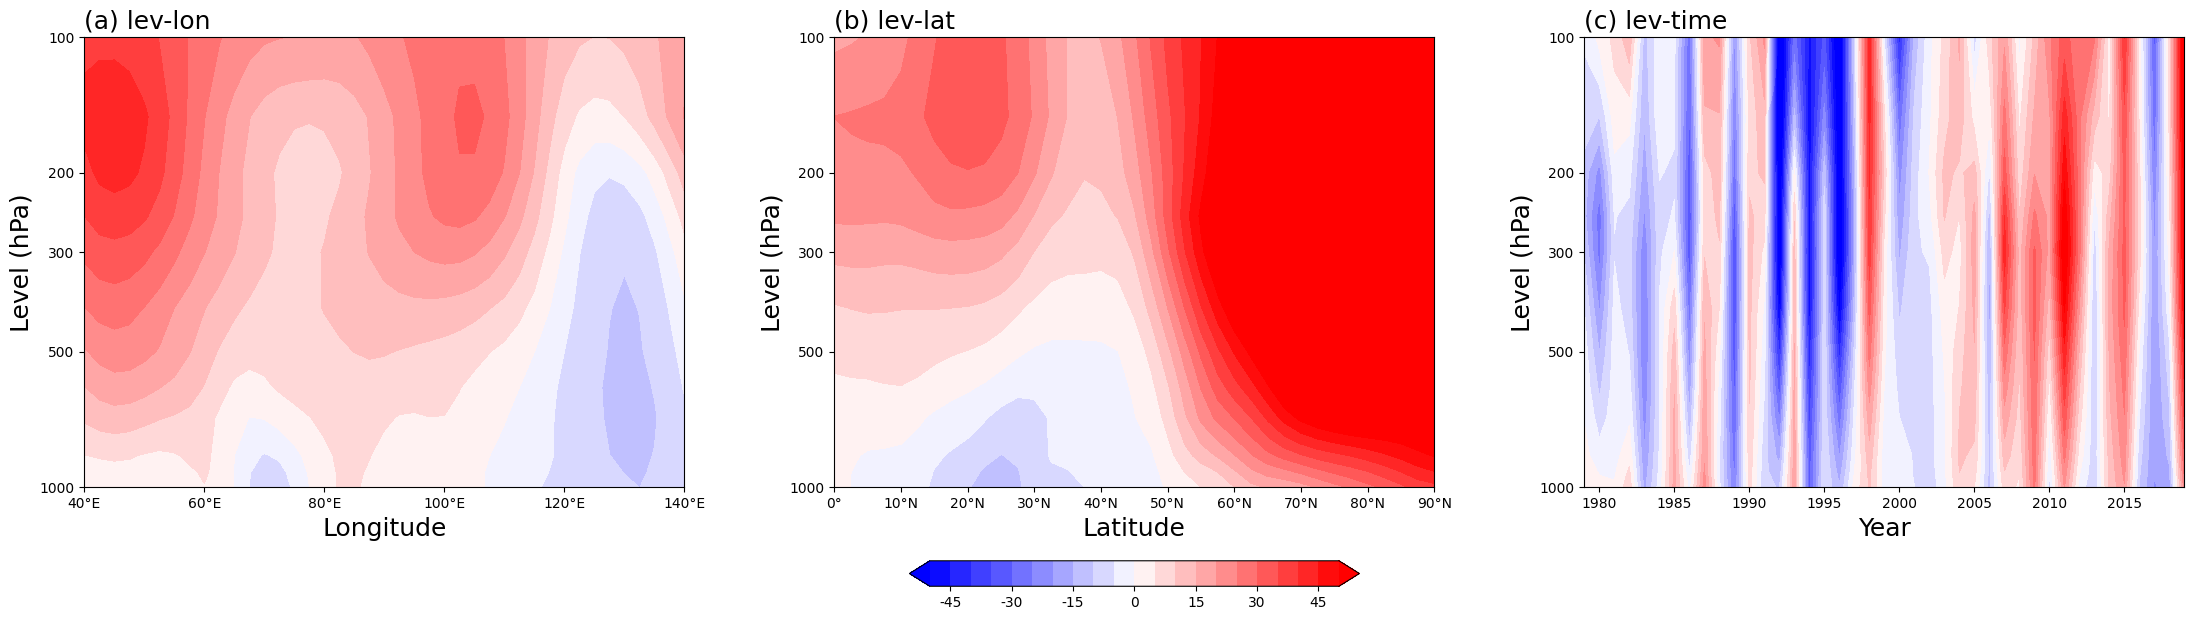

In [4]:
fig = plt.figure(figsize=(15,15))

f_ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.3])
f_ax1.set_title('(a) lev-lon',loc='left',fontsize=18)
f_ax1.set_yscale('symlog')
f_ax1.set_xlim(40,140)
f_ax1.set_yticks([1000, 500,300, 200, 100])
f_ax1.set_yticklabels(['1000','500','300','200','100'])
f_ax1.invert_yaxis()
f_ax1.set_ylabel('Level (hPa)',fontsize=18)
f_ax1.set_xlabel('Longitude',fontsize=18)
c = f_ax1.contourf(lon,level ,z_ver1[-1],levels=np.arange(-50,55,5), extend = 'both',zorder=0, cmap=plt.cm.bwr)
f_ax1.xaxis.set_major_formatter(cticker.LongitudeFormatter())

f_ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.3])
f_ax2.set_title('(b) lev-lat',loc='left',fontsize=18)
f_ax2.set_yscale('symlog')
f_ax2.set_xlim(0,90)
f_ax2.set_yticks([1000, 500,300, 200, 100])
f_ax2.set_yticklabels(['1000','500','300','200','100'])
f_ax2.invert_yaxis()
f_ax2.set_ylabel('Level (hPa)',fontsize=18)
f_ax2.set_xlabel('Latitude',fontsize=18)
c = f_ax2.contourf(lat,level ,z_ver2[-1],levels=np.arange(-50,55,5), extend = 'both',zorder=0, cmap=plt.cm.bwr)
f_ax2.xaxis.set_major_formatter(cticker.LatitudeFormatter())

f_ax3 = fig.add_axes([1.1, 0.1, 0.4, 0.3])
f_ax3.set_title('(c) lev-time',loc='left',fontsize=18)
f_ax3.set_yscale('symlog')
f_ax3.set_yticks([1000, 500,300, 200, 100])
f_ax3.set_yticklabels(['1000','500','300','200','100'])
f_ax3.invert_yaxis()
f_ax3.set_ylabel('Level (hPa)',fontsize=18)
f_ax3.set_xlabel('Year',fontsize=18)
c = f_ax3.contourf(year,level ,z_ver3.T,levels=np.arange(-50,55,5), extend = 'both',zorder=0, cmap=plt.cm.bwr)

position=fig.add_axes([0.65, 0.034, 0.3, 0.017])
fig.colorbar(c,cax=position,orientation='horizontal',format='%d',)

### 任意截面剖面图

In [5]:
lat_ver4 = np.linspace(55,30,60)
lon_ver4 = np.linspace(60,120,60)

z_ver4 = f_z['hgt'].loc[f_z.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2019-12-01'].loc[:,1000:100,:,:]    
z_ver4 = z_ver4.interp(lat=lat_ver4, lon=lon_ver4)
z_ver4 = np.array(z_ver4).diagonal(axis1=2,axis2=3).reshape((41,3,-1,60)).mean((1))
z_ver4 = z_ver4 - z_ver4.mean((0))

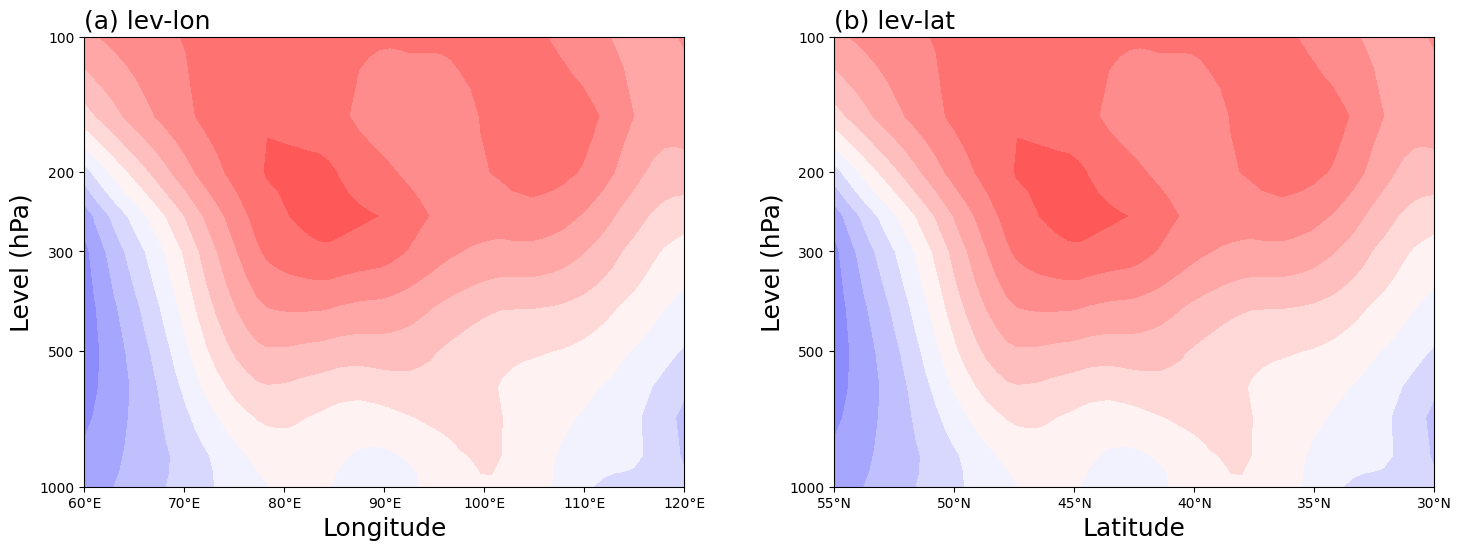

In [6]:
fig = plt.figure(figsize=(15,15))

f_ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.3])
f_ax1.set_title('(a) lev-lon',loc='left',fontsize=18)
f_ax1.set_yscale('symlog')
f_ax1.set_xlim(60,120)
f_ax1.set_yticks([1000, 500,300, 200, 100])
f_ax1.set_yticklabels(['1000','500','300','200','100'])
f_ax1.invert_yaxis()
f_ax1.set_ylabel('Level (hPa)',fontsize=18)
f_ax1.set_xlabel('Longitude',fontsize=18)
c = f_ax1.contourf(lon_ver4,level ,z_ver4[-1],levels=np.arange(-50,55,5), extend = 'both',zorder=0, cmap=plt.cm.bwr)
f_ax1.xaxis.set_major_formatter(cticker.LongitudeFormatter())

f_ax1 = fig.add_axes([0.6, 0.1, 0.4, 0.3])
f_ax1.set_title('(b) lev-lat',loc='left',fontsize=18)
f_ax1.set_yscale('symlog')
f_ax1.set_xlim(55,30)
f_ax1.set_yticks([1000, 500,300, 200, 100])
f_ax1.set_yticklabels(['1000','500','300','200','100'])
f_ax1.invert_yaxis()
f_ax1.set_ylabel('Level (hPa)',fontsize=18)
f_ax1.set_xlabel('Latitude',fontsize=18)
c = f_ax1.contourf(lat_ver4,level ,z_ver4[-1],levels=np.arange(-50,55,5), extend = 'both',zorder=0, cmap=plt.cm.bwr)
f_ax1.xaxis.set_major_formatter(cticker.LatitudeFormatter())

### 地形填充

In [8]:
f_oro = xr.open_dataset(r'D:\Tommy\++AI\++HeyWhale\+Moyu\geo.nc')
oro_ver1 = np.array(f_oro['z'].loc[:,45:30,:]).mean((1))[0]/9.8
oro_ver1 = 1013*(1-6.5/288000*oro_ver1)**5.255
lon_oro = f_oro.longitude

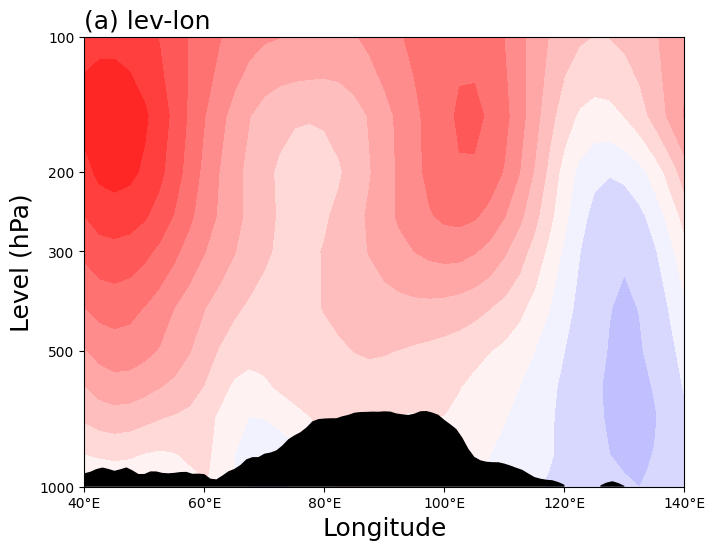

In [9]:
fig = plt.figure(figsize=(15,15))

f_ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.3])
f_ax1.set_title('(a) lev-lon',loc='left',fontsize=18)
f_ax1.set_yscale('symlog')
f_ax1.set_xlim(40,140)
f_ax1.set_yticks([1000, 500,300, 200, 100])
f_ax1.set_yticklabels(['1000','500','300','200','100'])
f_ax1.invert_yaxis()
f_ax1.set_ylabel('Level (hPa)',fontsize=18)
f_ax1.set_xlabel('Longitude',fontsize=18)
c = f_ax1.contourf(lon,level ,z_ver1[-1],levels=np.arange(-50,55,5), extend = 'both',zorder=0, cmap=plt.cm.bwr)
f_ax1.xaxis.set_major_formatter(cticker.LongitudeFormatter())
f_ax1.fill_between(lon_oro, oro_ver1, 1000, where=oro_ver1 < 1000, facecolor='k')
f_ax1.xaxis.set_major_formatter(cticker.LongitudeFormatter())

### 风场剖面图

In [11]:
f_u = xr.open_dataset(r'D:\Tommy\++AI\++HeyWhale\+Moyu\uwnd.mon.mean.nc')
u = f_u['uwnd'].loc[f_u.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2019-12-01',1000:100,45:30,:].mean(['lat','time'])

f_w = xr.open_dataset(r'D:\Tommy\++AI\++HeyWhale\+Moyu\omega.mon.mean.nc')
w = f_w['omega'].loc[f_w.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2019-12-01',1000:100,45:30,:].mean(['lat','time'])

level = f_u['level'].loc[1000:100]
lon = f_u['lon']

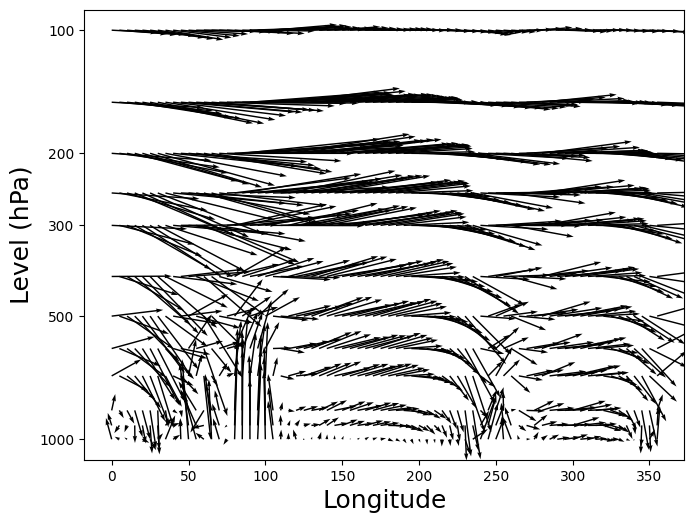

In [12]:
fig = plt.figure(figsize=(15,15))
f_ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.3])
f_ax1.set_yscale('symlog')
f_ax1.set_yticks([1000, 500,300, 200, 100])
f_ax1.set_yticklabels(['1000','500','300','200','100'])
f_ax1.invert_yaxis()
f_ax1.set_ylabel('Level (hPa)',fontsize=18)
f_ax1.set_xlabel('Longitude',fontsize=18)
f_ax1.quiver(lon[::2],level,u[:,::2],w[:,::2]*(-150),scale=100)
plt.show()